<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Monthly_index_calc_Mazyr_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating of monthly index for airborne activity of surface air

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
import matplotlib.ticker as ticker

In [12]:
#Adding dictionary for manipulating month numbers
m_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index13-18_Mazyr.csv'
df = pd.read_csv(path, parse_dates=['Date'])
df.tail()
#df.info()

,Date,Conc,w_i
308,2018-12-02,16.285714,0.800324
309,2018-12-09,16.857143,0.828406
310,2018-12-16,22.142857,1.088160
311,2018-12-23,15.571429,0.765222
312,2018-12-30,13.285714,0.652896


In [15]:
df1 = df.reset_index().drop('index', axis = 1)

In [16]:
df1['Week'] = df1.Date.dt.isocalendar().week
df1['Month'] = df1.Date.dt.month
df1['Year'] = df1.Date.dt.year
df_mod = df1.drop('Conc', axis =1)
df_mod

,Date,w_i,Week,Month,Year
0,2013-01-06,0.567468,1,1,2013
1,2013-01-13,0.942403,2,1,2013
2,2013-01-20,0.790403,3,1,2013
3,2013-01-27,1.489605,4,1,2013
4,2013-02-03,0.782803,5,2,2013
...,...,...,...,...,...
308,2018-12-02,0.800324,48,12,2018
309,2018-12-09,0.828406,49,12,2018
310,2018-12-16,1.088160,50,12,2018
311,2018-12-23,0.765222,51,12,2018


In [17]:
def mi(my_df, year):
  df_x = my_df[my_df['Year'] == year]
  df_x_m = df_x.groupby(by = 'Month').mean()
  df_x_m.reset_index(inplace = True)
  df_x_m = df_x_m.drop(['Week'], axis = 1)
  #df_x_m.columns = ['M_i', 'Year']
  return df_x_m

mi13 = mi(df_mod, 2013)
mi1 = mi03.append(mi(df_mod, 2014))
mi2 = mi1.append(mi(df_mod, 2015))
mi3 = mi2.append(mi(df_mod, 2016))
mi4 = mi3.append(mi(df_mod, 2017))
mi5 = mi4.append(mi(df_mod, 2018))

mi5['Mon'] = mi5['Month'].replace(m_dict)
mi_fin=mi5.drop(['Month'], axis = 1)
mi_fin

,Year,w_i,Mon
0,2014,0.605810,Jan
1,2014,0.689370,Feb
2,2014,1.029716,Mar
3,2014,1.118418,Apr
4,2014,1.001112,May
5,2014,0.870309,Jun
6,2014,0.901483,Jul
7,2014,0.829172,Aug
8,2014,1.118418,Sep
9,2014,1.033251,Oct


In [23]:
#adding seasons in front of Month
mi_fin['season'] = np.where(mi_fin.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
mi_fin.columns = ('Year','m_i', 'Mon', 'season')
mi_fin.head(30)

,Year,m_i,Mon,season
0,2014,0.605810,Jan,win
1,2014,0.689370,Feb,win
2,2014,1.029716,Mar,win
3,2014,1.118418,Apr,sum
4,2014,1.001112,May,sum
5,2014,0.870309,Jun,sum
6,2014,0.901483,Jul,sum
7,2014,0.829172,Aug,sum
8,2014,1.118418,Sep,sum
9,2014,1.033251,Oct,win


In [24]:
mi_sum = mi_fin.loc[mi_fin['Mon'].isin(['Apr','May','Jun','Jul','Aug','Sep'])]
mi_sum

,Year,m_i,Mon,season
3,2014,1.118418,Apr,sum
4,2014,1.001112,May,sum
5,2014,0.870309,Jun,sum
6,2014,0.901483,Jul,sum
7,2014,0.829172,Aug,sum
8,2014,1.118418,Sep,sum
15,2015,0.574090,Apr,sum
16,2015,0.847546,May,sum
17,2015,1.005351,Jun,sum
18,2015,0.804281,Jul,sum


In [25]:
mi_win = mi_fin.loc[mi_fin['Mon'].isin(['Jan','Feb','Mar','Oct','Nov','Dec'])]
mi_win

,Year,m_i,Mon,season
0,2014,0.605810,Jan,win
1,2014,0.689370,Feb,win
2,2014,1.029716,Mar,win
9,2014,1.033251,Oct,win
10,2014,1.613350,Nov,win
11,2014,1.103956,Dec,win
12,2015,1.145407,Jan,win
13,2015,0.809828,Feb,win
14,2015,1.114900,Mar,win
21,2015,1.229995,Oct,win


# *Building plots for overall data*

In [26]:
mi_fin = mi_fin.reset_index(drop=True)
mi_win = mi_win.reset_index(drop=True)
mi_sum = mi_sum.reset_index(drop=True)

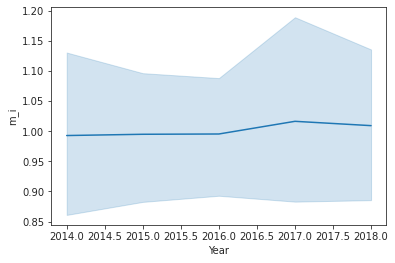

In [27]:
#Чтобы устанавливать параметры графика, нужно дать "разрешение" через установку стиля
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 10})
sns.lineplot(data = mi_fin, x = 'Year', y = 'm_i')

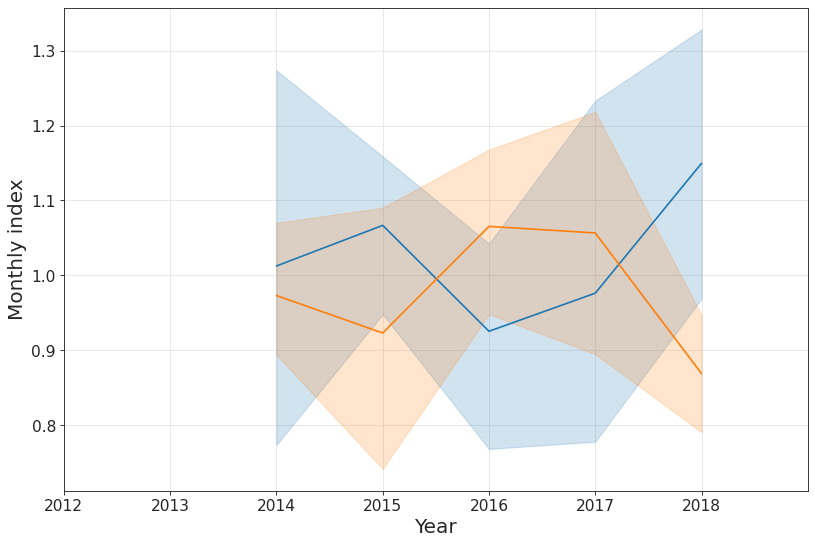

In [28]:
f, ax = plt.subplots(figsize = (12, 8), dpi = 80)
sns.lineplot(data = mi_win,
             ax = ax,
             x = mi_win['Year'],
             y = mi_win['m_i'],
             markers = True)             
sns.lineplot(data = mi_sum,
             ax = ax,
             x = mi_sum['Year'],
             y = mi_sum['m_i'],
             markers = True)
ax.set(xlim = (2012, 2019))
ax.set_ylabel('Monthly index', fontsize = 18)
ax.set_xlabel('Year', fontsize = 18)
plt.xticks(np.arange(2012, 2019, 1),fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.5)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig1_M.png')

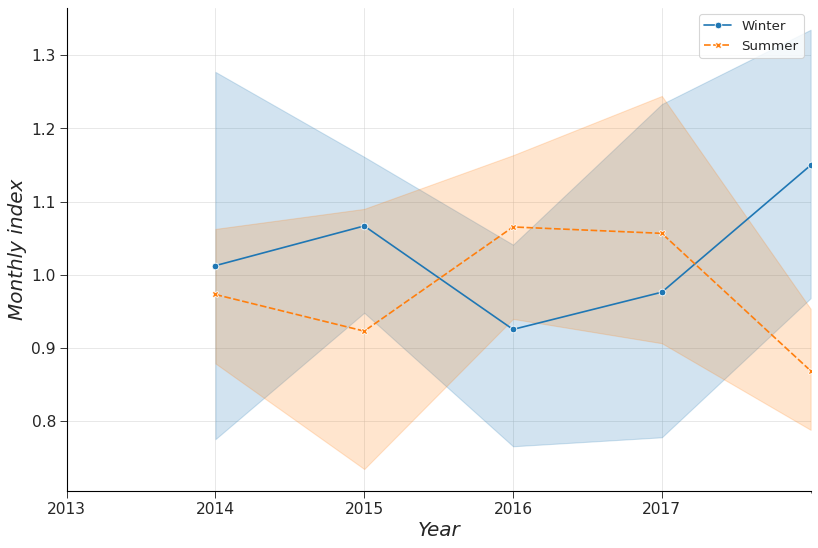

In [30]:
f, ax = plt.subplots(figsize = (12, 8), dpi = 80)
sns.lineplot(data = mi_fin,            
             x = 'Year',
             y = 'm_i',
             hue = 'season',
             style = 'season',
             markers = True)
ax.set(xlim = (2013, 2018))
ax.set_ylabel('Monthly index', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
ax.set_xlabel('Year', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(ticker.AutoLocator())
#ax.minorticks_on()
#ax.tick_params(direction='out', labelsize = 12, length = 6)
plt.tick_params(axis = 'both', direction='out', length = 6)
plt.xticks(np.arange(2013, 2018, 1), fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels=["Winter","Summer"], fontsize = 'large', loc = 1)
plt.grid(alpha = 0.5)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig2_M.png')    

# *Two graphs in a single image*

In [31]:
def mi_calc(my_df, year):
  df_x = my_df[my_df['Year'] == year]
  df_x_m = df_x.groupby(by = 'Month').mean()
  df_x_m.reset_index(inplace = True)
  df_x_m = df_x_m.drop(['Week', 'Year'], axis = 1)
  df_x_m.columns = ['Month', str(year)]
  return df_x_m

monthly_ind = mi_calc(df_mod, 2013)
#monthly_ind = df03_m.merge(df04, on = 'Month')
i = 2014
while i < 2019:
  monthly_ind = monthly_ind.merge(mi_calc(df_mod, i), on = 'Month')
  i += 1
monthly_ind.set_index('Month')

,2013,2014,2015,2016,2017,2018
Month,,,,,,
1,0.947470,0.605810,1.145407,1.071196,0.924649,0.944242
2,1.018403,0.689370,0.809828,1.008519,0.984091,1.440934
3,0.971283,1.029716,1.114900,0.968634,1.571903,1.154854
4,0.990378,1.118418,0.574090,1.225038,0.969854,1.033401
5,0.999403,1.001112,0.847546,0.949262,1.459624,0.888079
6,0.892243,0.870309,1.005351,1.143843,1.228462,0.868773
7,0.849303,0.901483,0.804281,1.119912,0.894414,0.753989
8,1.062103,0.829172,1.280009,1.146692,0.964277,0.730120
9,0.922643,1.118418,1.027538,0.807670,0.823378,0.939328


In [32]:
monthly_ind['Mean'] = monthly_ind.iloc[:, 1:9].mean(axis=1)
monthly_ind.to_csv('/content/drive/MyDrive/Colab Notebooks/Data for JER/Mon_index2013-2018_Mazyr.csv')
monthly_ind

,Month,2013,2014,2015,2016,2017,2018,Mean
0,1,0.947470,0.605810,1.145407,1.071196,0.924649,0.944242,0.939796
1,2,1.018403,0.689370,0.809828,1.008519,0.984091,1.440934,0.991857
2,3,0.971283,1.029716,1.114900,0.968634,1.571903,1.154854,1.135215
3,4,0.990378,1.118418,0.574090,1.225038,0.969854,1.033401,0.985196
4,5,0.999403,1.001112,0.847546,0.949262,1.459624,0.888079,1.024171
5,6,0.892243,0.870309,1.005351,1.143843,1.228462,0.868773,1.001497
6,7,0.849303,0.901483,0.804281,1.119912,0.894414,0.753989,0.887231
7,8,1.062103,0.829172,1.280009,1.146692,0.964277,0.730120,1.002062
8,9,0.922643,1.118418,1.027538,0.807670,0.823378,0.939328,0.939829
9,10,0.990853,1.033251,1.229995,1.079173,0.774944,1.110976,1.036532


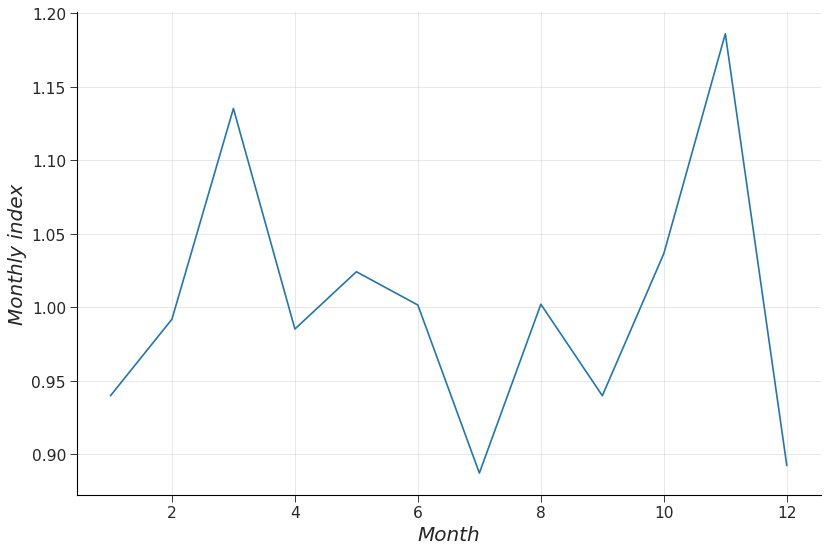

In [33]:
f, ax = plt.subplots(figsize = (12, 8), dpi = 80)
sns.lineplot(data=monthly_ind, x = 'Month', y = 'Mean')
ax.set_ylabel('Monthly index', fontsize = 18,fontstyle='oblique', fontweight = 'medium')
ax.set_xlabel('Month', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
ax.tick_params(axis = 'both', labelsize = 12, length = 6)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.5)

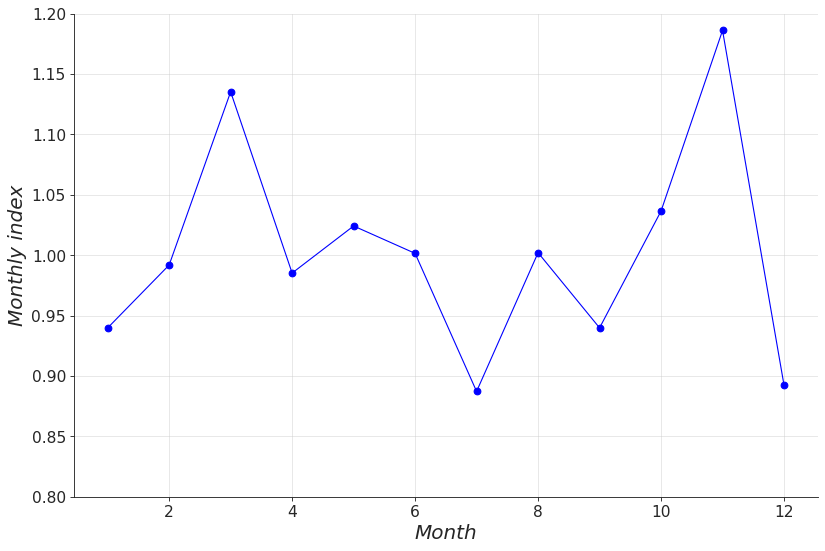

In [37]:
x = monthly_ind['Month']
y = monthly_ind['Mean']
fig, ax = plt.subplots(1, figsize = (12,8), dpi = 80)
#plt.figure(1, figsize = (12,8), dpi = 80)
plt.plot(x, y, 
         color='blue',
         marker='o',
         linestyle='solid',
         linewidth=1,
         markersize = 6)
plt.xlabel('Month', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.ylabel('Monthly index', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set(ylim = (0.8, 1.20))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha = 0.5)

In [ ]:
#использовать цикл для перебора столбцов
#использовать метод loc[]
#длина фрейма?
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
monthly_ind_mod = monthly_ind.T
monthly_ind_mod.loc['Month'] = monthly_ind_mod.loc['Month'].apply(np.int64)
monthly_ind_mod

,0,1,2,3,4,5,6,7,8,9,10,11
Month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
2003,1.511703,0.858903,1.121710,1.029055,1.219667,0.994440,0.977070,0.765622,0.782491,0.731550,1.034191,0.994607
2004,1.206579,0.899643,0.751466,1.103385,1.071104,0.905596,1.018536,1.510553,1.666985,0.989254,0.820262,0.439237
2005,0.623029,0.980893,0.661115,1.419241,0.892505,0.797650,0.698482,1.218032,1.118326,1.560806,1.517151,0.659543
2006,1.185612,2.786187,0.988800,0.976944,1.083649,0.704253,1.130283,0.751678,0.661571,0.753100,0.571465,0.515978
2007,0.504684,0.656399,0.949508,1.151794,1.167275,1.384011,0.790156,1.164179,1.146840,1.281836,0.947444,0.866942
2008,0.977553,0.630303,0.639641,1.219753,1.251852,1.034164,1.059259,1.218586,1.205163,0.992144,0.714343,1.155556
2009,1.538770,1.685138,1.602663,1.254944,0.948972,0.898571,0.789113,0.706638,0.957118,0.554925,0.373683,0.781476
2010,0.740858,1.000158,0.711224,1.032262,1.051031,1.037201,1.328605,1.715169,0.730980,0.847542,0.802596,0.913725
2011,0.772284,0.868571,0.702302,1.390376,0.861623,0.764343,0.817946,1.109290,0.828865,1.308317,1.238335,1.220963


In [35]:
from scipy.stats import ttest_ind

In [36]:
def t_test(dat1, dat2):
  stat, p = ttest_ind(dat1, dat2)
  alpha1 = 0.05
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  if p > alpha1:
      print('Same distributions (fail to reject H0)')
  else:
      print('Different distributions (reject H0)')
  return stat, p


data1 = mi_win.m_i
data2 = mi_sum.m_i
t_test(data1, data2)

  

Statistics=0.836, p=0.406
Same distributions (fail to reject H0)


(0.8364918073037304, 0.4063115155539634)